In [2]:
import os

import zipfile as zip
import pandas as pd
import csv
import numpy as np
import requests as rq
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import pip
import warnings
from cif import cif
import xml.etree.ElementTree as ET
import pandas_read_xml as pdx
import pandasdmx as sdmx
import re
import seaborn as sns

C:\Users\vw191\Downloads\annaconda\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\vw191\Downloads\annaconda\lib\site-packages\pandasdmx\remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  warn(


In [3]:
df = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\oecd.xlsx', sheet_name='OECD.Stat export',header=None,skiprows=6,nrows=1132,na_values='..')
df.columns = ['metro_area','year','unit','pop_density','pop_density_core','pop_density_hinterland','urbanised_area_per_capita','polycentricity','pop','pop_core','pop_hinterland','gr_index_pop','pop_metro_shr_cry','gdp_metro_shr_cry','gdp_per_capita','prod','gini','poverty_rate','shr_access_fibre','homocide_rate','shr_pop_core_pm2.5>25','tree_cover_shr_core_area'] #Rename all columns.
df = df.drop('unit',axis=1) #Drop unit column.
df.metro_area = df.metro_area.ffill(axis=0,limit=11) #As the file was xlsx the metropolitan names did not fill for each row. Therefore I ffill to include the correct name for all rows.
df.polycentricity = df.polycentricity.bfill(axis=0,limit=11) #The file includes polycentricity dummy variable data only in the last year for each city. Therefore, I bfill to include the polycentricity data for all rows.
df[['id','name']] = df['metro_area'].str.split(':', 1, expand=True) #split metro_area column into the oecd id and metro name.
#Convert all numeric columns to float dtype.
for i in ['year','pop_density','pop_density_core','pop_density_hinterland','urbanised_area_per_capita','pop','pop_core','pop_hinterland','gr_index_pop','pop_metro_shr_cry','gdp_metro_shr_cry','gdp_per_capita','prod','gini','poverty_rate','shr_access_fibre','homocide_rate','shr_pop_core_pm2.5>25','tree_cover_shr_core_area']:
    df[i] = df[i].astype('float')
df1 = df
df1.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\oecd_metro.csv')
#https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/oecd_metro.csv


In [13]:
df.columns

Index(['metro_area', 'year', 'pop_density', 'pop_density_core',
       'pop_density_hinterland', 'urbanised_area_per_capita', 'polycentricity',
       'pop', 'pop_core', 'pop_hinterland', 'gr_index_pop',
       'pop_metro_shr_cry', 'gdp_metro_shr_cry', 'gdp_per_capita', 'prod',
       'gini', 'poverty_rate', 'shr_access_fibre', 'homocide_rate',
       'shr_pop_core_pm2.5>25', 'tree_cover_shr_core_area', 'id', 'name'],
      dtype='object')

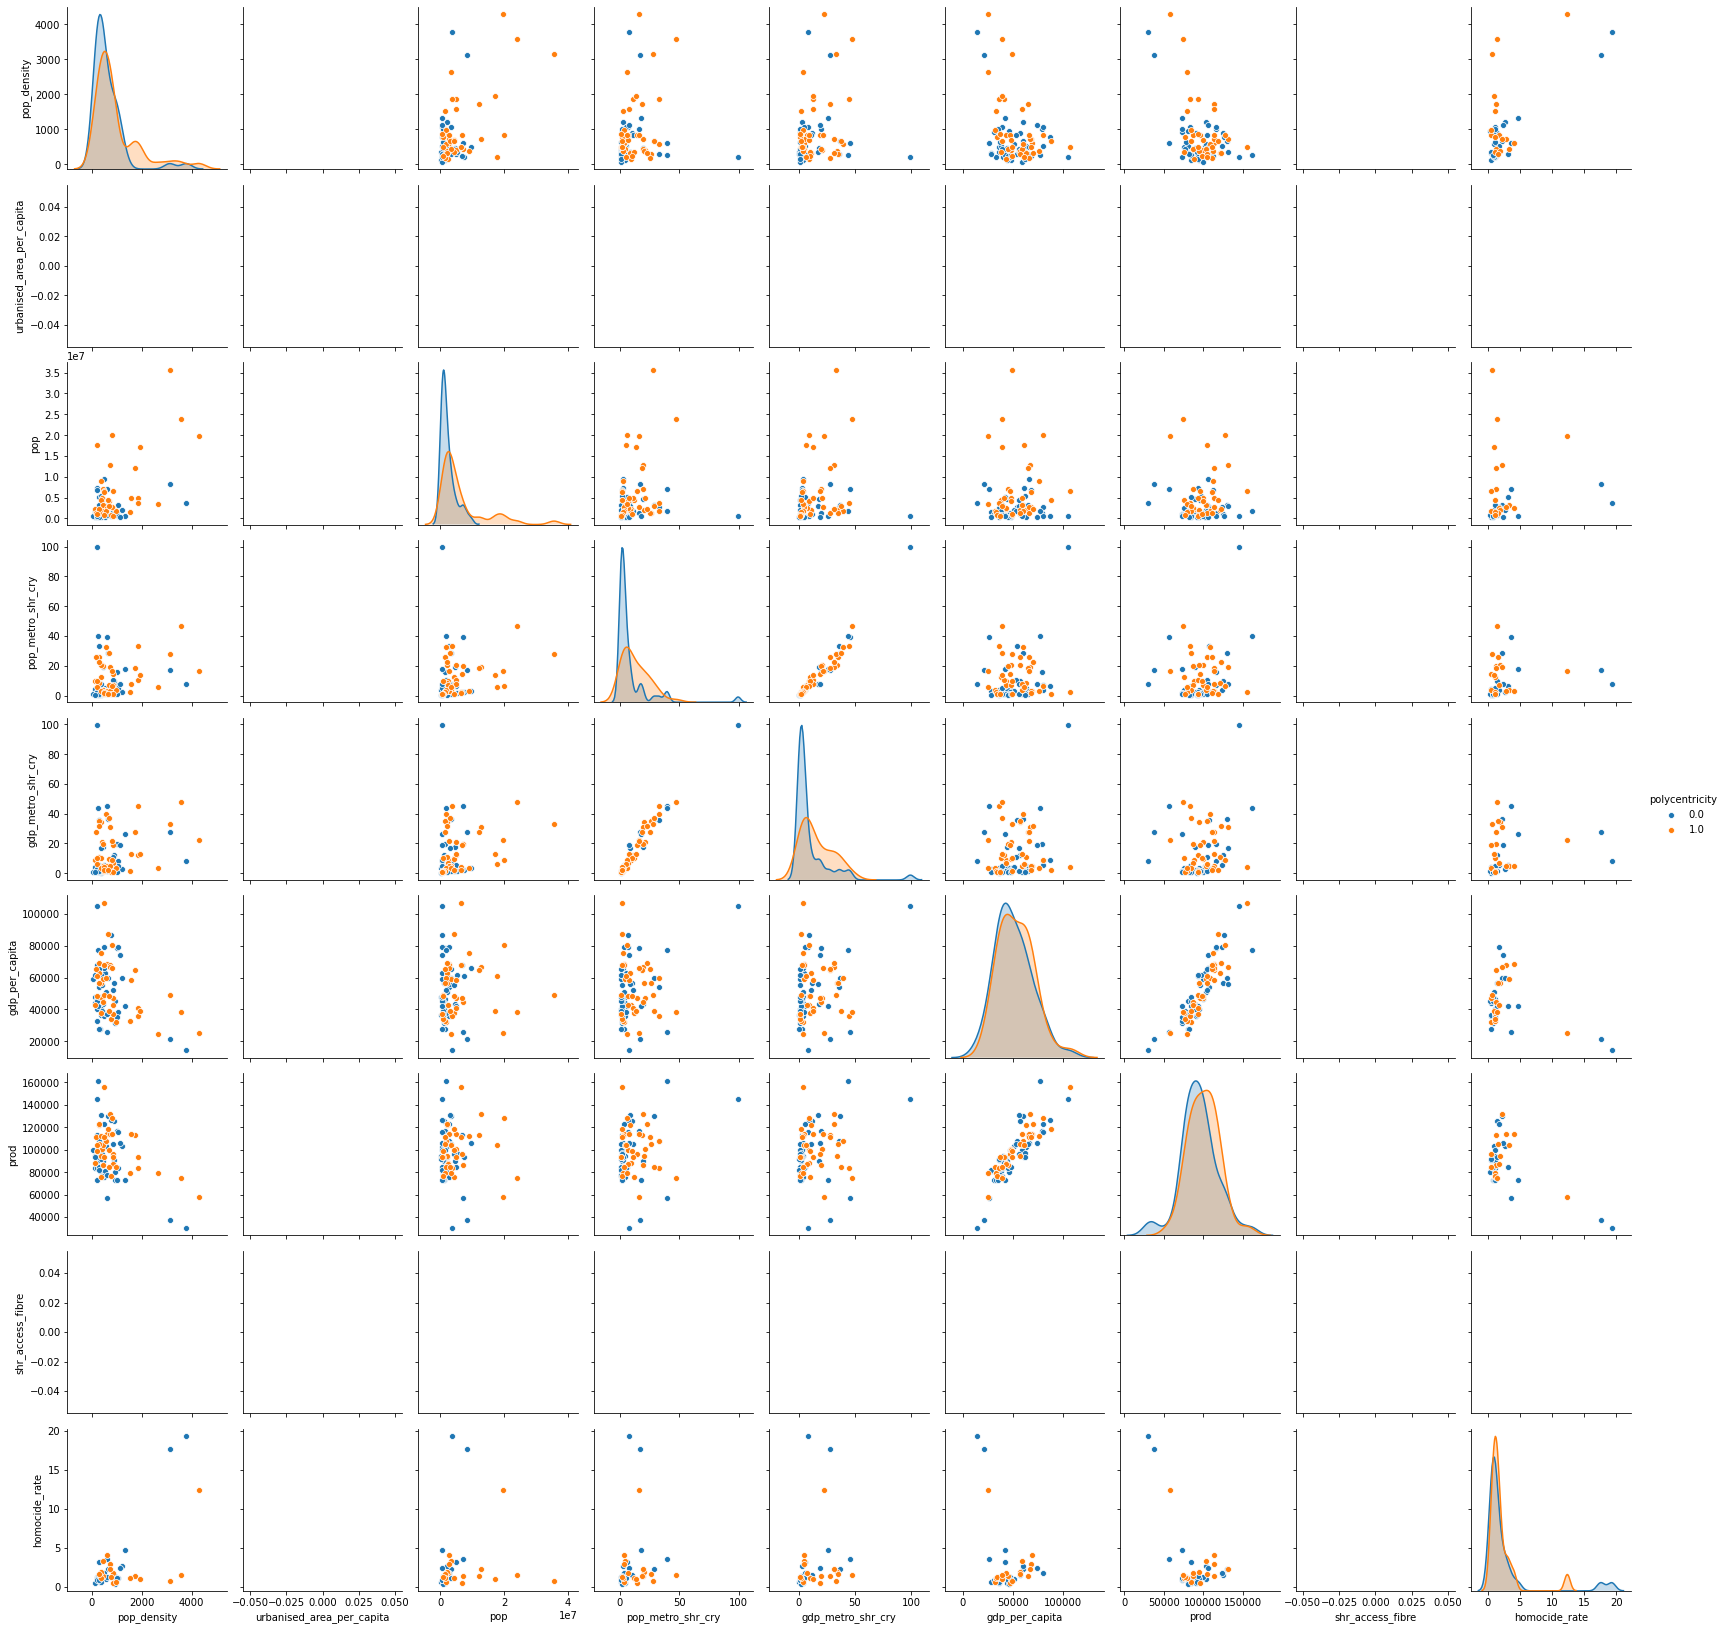

In [10]:
df2 = df[df['year'] == 2015]
sns.pairplot(data=df2[['pop_density','urbanised_area_per_capita','pop','pop_metro_shr_cry','gdp_metro_shr_cry','gdp_per_capita','prod','shr_access_fibre','homocide_rate','polycentricity']], hue='polycentricity')

In [ ]:
sns.pairplot(data=df1[['pop_density','urbanised_area_per_capita','pop','pop_metro_shr_cry','gdp_metro_shr_cry','gdp_per_capita','prod','shr_access_fibre','homocide_rate']])